# Module 2: Bayesian Network - Demo 2: Jewellery Campaign Success

In [1]:
#Import the package
from pgmpy.models import BayesianModel

In [2]:
#Create an empty Bayesian Model
model = BayesianModel()

In [3]:
#Add the nodes and edges
model.add_nodes_from(['Gender', 'Success'])
model.add_edge('Gender', 'Success')
model.add_edge('Age-group', 'Success')
model.nodes()


['Gender', 'Success', 'Age-group']

In [4]:
model.edges()


[('Gender', 'Success'), ('Age-group', 'Success')]

### Define CPD's for all the nodes and add them to the network

In [5]:

from pgmpy.factors.discrete import TabularCPD
cpd_gender = TabularCPD('Gender', 2, [[0.45], [0.55]])
cpd_age_group = TabularCPD('Age-group', 2, [[0.4], [0.6]])
model.add_cpds(cpd_gender, cpd_age_group)
model.add_node('Marital_status')
model.add_edge('Age-group', 'Marital_status')


In [6]:
cpd_marital_status = TabularCPD('Marital_status', 2,
                                      [[0.65, 0.15],
                                       [0.35, 0.85]],
                                      evidence=['Age-group'],
                                      evidence_card=[2])
model.add_cpds(cpd_marital_status)
model.add_edge('Marital_status','Success')
model.add_nodes_from(['Business','Employed'])
model.add_edges_from([('Business', 'Employed'),
                    ('Employed', 'Success')])

In [7]:
cpd_business = TabularCPD('Business', 2, [[0.67], [0.33]])
cpd_employed = TabularCPD('Employed', 2,
                                      [[.55, 0.15],
                                       [.45, 0.85]],
                                      evidence=['Business'],
                                      evidence_card=[2])
model.add_cpds(cpd_business, cpd_employed)


In [8]:
cpd_success = TabularCPD('Success', 2,
                                [[1, 0.85, 0.65, 0.12, 0.95, 0.8, 0.95, 0.4, 0.05, 0.9, 0.6, 0.7, 0.8, 0.5, 0.9, 0.02],
                                 [0, 0.15, 0.35, 0.88, 0.05, 0.2, 0.05, 0.6, 0.95, 0.1, 0.4, 0.3, 0.2, 0.5, 0.1, 0.98]],
                                evidence=['Gender','Age-group','Marital_status','Employed'],
                                evidence_card=[2,2,2,2])
model.add_cpds(cpd_success)


In [9]:
print(model.get_cpds('Gender'))
print(model.get_cpds('Marital_status'))
print(model.get_cpds('Age-group'))

     

+----------+------+
| Gender_0 | 0.45 |
+----------+------+
| Gender_1 | 0.55 |
+----------+------+
+------------------+-------------+-------------+
| Age-group        | Age-group_0 | Age-group_1 |
+------------------+-------------+-------------+
| Marital_status_0 | 0.65        | 0.15        |
+------------------+-------------+-------------+
| Marital_status_1 | 0.35        | 0.85        |
+------------------+-------------+-------------+
+-------------+-----+
| Age-group_0 | 0.4 |
+-------------+-----+
| Age-group_1 | 0.6 |
+-------------+-----+


In [10]:
print(model.get_cpds('Business'))
print(model.get_cpds('Employed'))


+------------+------+
| Business_0 | 0.67 |
+------------+------+
| Business_1 | 0.33 |
+------------+------+
+------------+------------+------------+
| Business   | Business_0 | Business_1 |
+------------+------------+------------+
| Employed_0 | 0.55       | 0.15       |
+------------+------------+------------+
| Employed_1 | 0.45       | 0.85       |
+------------+------------+------------+


In [11]:
print(model.get_cpds('Success'))

+----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| Gender         | Gender_0         | Gender_0         | Gender_0         | Gender_0         | Gender_0         | Gender_0         | Gender_0         | Gender_0         | Gender_1         | Gender_1         | Gender_1         | Gender_1         | Gender_1         | Gender_1         | Gender_1         | Gender_1         |
+----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| Age-group      | Age-group_0 

### Consistency of Model

In [12]:
model.check_model()

True

In [13]:
#Local independencies of variable
model.local_independencies('Success')

(Success _|_ Business | Gender, Employed, Marital_status, Age-group)

### Graphical Representation of Network

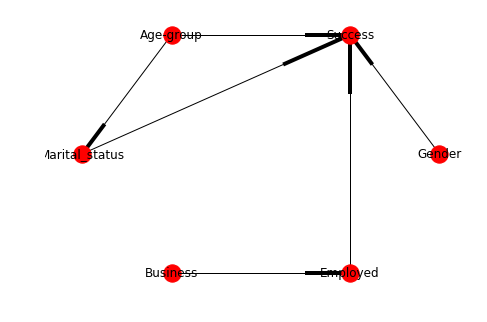

In [16]:
#Graphical representation 
import warnings
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_shell(model,with_labels=True)
plt.show()